In [1]:
#GO ETHEREUM!!
#To the Moon!!

#imports
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [2]:
#read file path in

crypto_raw_df = pd.read_csv(Path('Resources/crypto_data.csv'))
crypto_raw_df.head(10)

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
6,2015,2015 coin,X11,True,PoW/PoS,NaN,0
7,BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0
9,LTC,Litecoin,Scrypt,True,PoW,6.303924e+07,84000000


In [3]:
# clean traded data

cleaned_crypto_df = crypto_raw_df.loc[crypto_raw_df["IsTrading"]==True]
cleaned_crypto_df = cleaned_crypto_df.drop(columns=['Unnamed: 0','IsTrading'],axis=1)
cleaned_crypto_df.head(10)

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365Coin,X11,PoW/PoS,NaN,2300000000
2,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,SixEleven,SHA-256,PoW,NaN,611000
4,808,SHA-256,PoW/PoS,0.000000e+00,0
5,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
6,2015 coin,X11,PoW/PoS,NaN,0
7,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,Ethereum,Ethash,PoW,1.076842e+08,0
9,Litecoin,Scrypt,PoW,6.303924e+07,84000000


In [4]:
#remove data which houses null 

cleaned_crypto_df = cleaned_crypto_df.dropna(axis=0)
cleaned_crypto_df.head(10)

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,SHA-256,PoW/PoS,0.000000e+00,0
5,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,Ethereum,Ethash,PoW,1.076842e+08,0
9,Litecoin,Scrypt,PoW,6.303924e+07,84000000
10,Dash,X11,PoW/PoS,9.031294e+06,22000000
11,Monero,CryptoNight-V7,PoW,1.720114e+07,0
12,Ethereum Classic,Ethash,PoW,1.133597e+08,210000000


In [5]:

# filter by mined currency greater than zero
mined_df = cleaned_crypto_df.loc[cleaned_crypto_df.TotalCoinsMined > 0]
mined_df.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,Ethereum,Ethash,PoW,1.076842e+08,0


In [7]:
#drop coin name
mined_df = mined_df.drop(columns='CoinName',axis=1)
mined_df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0


In [9]:
#grab length add in dummy df
dummy_df = pd.get_dummies(mined_df, columns=['Algorithm', 'ProofType'])
len(dummy_df.columns)

98

In [12]:
#standardize dataset
scaler = StandardScaler()
scaled_dummy_df = scaler.fit_transform(dummy_df)


In [14]:
#establish PCA model; grab variances
pca=PCA(n_components = 5)

pca_df=pca.fit_transform(scaled_dummy_df)

pca_df_coin = pd.DataFrame(data=pca_df, columns=["PCA1", "PCA2", "PCA3", "PCA4", "PCA5"])
pca_df_coin.head(5) 

,PCA1,PCA2,PCA3,PCA4,PCA5
0,-0.347984,0.988608,-0.578635,-0.003495,0.012994
1,-0.331292,0.988973,-0.578967,-0.003599,0.012946
2,2.313127,1.624978,-0.712697,-0.012486,0.021749
3,-0.134522,-1.306795,0.192720,0.003897,-0.009418
4,-0.144353,-2.012178,0.394858,-0.003089,0.019737


In [15]:
#format/dispalay array

pca.explained_variance_ratio_

array([0.02793077, 0.02139217, 0.02051093, 0.02044481, 0.02044031])

In [18]:
#transformed variance array
pca_clean = PCA(n_components=.90)
crypto_pca_clean = pca_clean.fit_transform(scaled_dummy_df)

crypto_pca_clean

array([[-3.35098808e-01,  1.03218907e+00, -5.90713438e-01, ...,
         7.87306563e-16, -1.84616729e-18, -4.15361072e-15],
       [-3.18433948e-01,  1.03233143e+00, -5.91125551e-01, ...,
         1.17409449e-15,  5.25116470e-16, -3.80497340e-15],
       [ 2.30546811e+00,  1.65638302e+00, -6.83616670e-01, ...,
         2.75207903e-14, -2.36464424e-14,  2.84400186e-14],
       ...,
       [ 3.24348535e-01, -2.31230764e+00,  4.21515366e-01, ...,
         1.93578889e-14, -8.67896697e-15, -3.66917605e-14],
       [-1.49363652e-01, -2.04933553e+00,  4.12968257e-01, ...,
        -1.78255127e-15, -2.03579310e-16, -4.38160754e-16],
       [-2.89957500e-01,  8.21194511e-01, -2.76326847e-01, ...,
        -4.70588149e-16, -9.07306180e-17, -2.78763670e-15]])

In [21]:
#transform Principal Component Analysis to DataFrame
transformed_df = pd.DataFrame(data=crypto_pca_clean)
transformed_df.head(5)



,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-0.335099,1.032189,-0.590713,0.001397,2.734816e-12,-5.417255e-15,-1.223976e-16,-0.007129,-1.319756,-0.051813,...,7.930746e-17,1.066184e-15,2.929092e-15,-7.260564e-16,-1.958946e-15,1.858141e-15,-1.863509e-15,7.873066e-16,-1.846167e-18,-4.153611e-15
1,-0.318434,1.032331,-0.591126,0.001386,2.712386e-12,-5.575109e-15,-2.141355e-16,-0.007739,-1.322514,-0.056674,...,5.236227e-17,3.558103e-16,3.123007e-15,-5.243003e-17,-1.703046e-15,1.069014e-15,-1.856951e-15,1.174094e-15,5.251165e-16,-3.804973e-15
2,2.305468,1.656383,-0.683617,0.004731,9.322259e-12,-6.700325e-15,7.872127e-15,-0.054781,-1.542879,-0.943951,...,3.638111e-14,-1.841986e-14,-5.521324e-14,-7.303804e-14,2.329683e-14,-3.527460e-14,3.114482e-14,2.752079e-14,-2.364644e-14,2.844002e-14
3,-0.145184,-1.320593,0.192813,-0.001229,-2.420624e-12,2.357806e-15,-1.697979e-15,-0.002071,0.281463,0.251862,...,4.765898e-15,2.352318e-17,-2.522688e-14,6.604406e-15,-9.542520e-15,-1.391009e-14,2.591484e-15,2.225494e-15,4.614234e-15,4.660314e-15
4,-0.151768,-2.036192,0.396182,-0.001705,-3.352037e-12,2.706411e-15,-1.587523e-15,0.027735,0.519099,0.188820,...,-3.035501e-14,6.137487e-14,-3.172419e-14,-3.873903e-14,-7.522860e-14,-7.057959e-14,4.784940e-14,9.436182e-15,1.251016e-13,-3.544121e-15


([<matplotlib.axis.XTick at 0x12a815bb0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

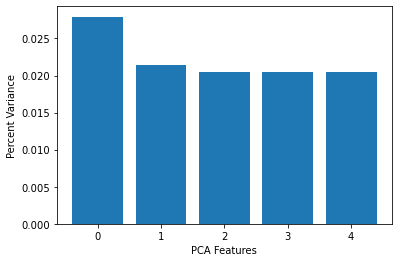

In [24]:
#Plotting variances v features
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_)
plt.xlabel('PCA Features')
plt.ylabel('Percent Variance')
plt.xticks(features)

In [26]:
#establish learning rate
tsne = TSNE(learning_rate=50)
tsne

TSNE(learning_rate=50)

In [27]:
#generate tsne output
tsne_features = tsne.fit_transform(transformed_df)
tsne_features.shape

(532, 2)

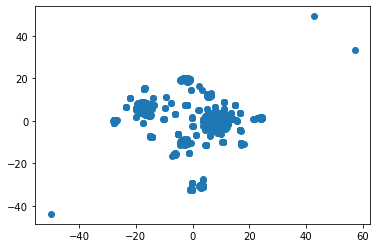

In [29]:
#establish matplot graph for tsne generated info

x = tsne_features[:,0]
y = tsne_features[:,1]
plt.scatter(x, y)
plt.show()



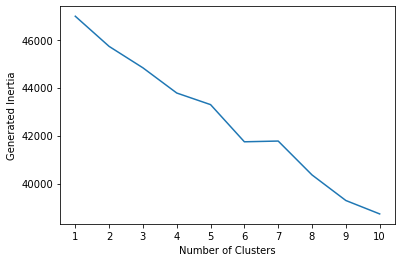

In [32]:
#generate elbow graph w/ kmeans

inertia_container = []
l_range = list(range(1, 11))

for i in l_range:
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(transformed_df)
    inertia_container.append(km.inertia_)

# Elbow Curve
elbow_data = {"K": l_range, "Inertia": inertia_container}
df_elbow = pd.DataFrame(elbow_data)
plt.plot(df_elbow['K'], df_elbow['Inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of Clusters')
plt.ylabel('Generated Inertia')
plt.show()